<a href="https://colab.research.google.com/github/7rohj/.-/blob/main/%EC%B2%A0%EB%8F%84(%EC%99%84%EC%84%B1)v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* 추가 수정사항 *</br>
0.버스(mode=3)도 추가
1.맨처음 t lines init 중간중간마다 lay=0
2. tft ~ lay 까지 앞에 space 3
3.line과 desc에 ' ' 붙이기
4..txt 파일로 저장

In [52]:
import pandas as pd
import numpy as np

# 구글 드라이브 마운트, 일일이 파일 업로드할 필요 없음
# 마지막 / 이후 파일명 수정하면 됨
train_info2019 = pd.read_table('/content/drive/MyDrive/철도/2030_TRANSIT_INFO.txt', sep='\t', encoding='euc-kr')
train_path2019 = pd.read_table('/content/drive/MyDrive/철도/2030_TRANSIT_PATH.txt', sep='\t', encoding='euc-kr')
train_info2019.head(3)

,Line_ID,Mode,Type,Name,Peak_Headway,OffPeak_Headway,Avg_Headway,Peak_Frequency,OffPeak_Frequency,Total_Frequency,Commercial_Speed,No_seat,Capacity
0,1,3,1,서울_서울_02(순환),8.0,10.0,9,24.0,105.0,129.0,30,25,50
1,2,3,1,서울_서울_03(순환),13.0,17.0,15,6.0,53.0,59.0,30,25,50
2,3,3,1,서울_서울_04(순환),12.0,17.0,14.5,13.0,56.0,69.0,30,25,50


In [53]:
# 도로 = 3, 철도 = 4/ 도로 철도 all
#train_info2019 = train_info2019[train_info2019['Mode'] == 4]
#train_info2019 = train_info2019.reset_index(drop=True)
train_path2019['Station_Y/N'] = train_path2019['Station_Y/N'].replace(1,0.75)
train_path2019['Station_Y/N'] = train_path2019['Station_Y/N'].replace(0,'#.00')
train_info2019.tail(3)

,Line_ID,Mode,Type,Name,Peak_Headway,OffPeak_Headway,Avg_Headway,Peak_Frequency,OffPeak_Frequency,Total_Frequency,Commercial_Speed,No_seat,Capacity
3923,6201,4,921,위례신사선,2.5,4.82,3.66,96.0,199.0,295.0,33.8,48,210
3924,6202,4,924,GTX-C노선,7.5,10.00,8.75,32.0,90.0,122.0,92.21,424,1437
3925,6203,4,923,GTX-B노선,7.5,15.00,11.25,32.0,60.0,92.0,97.11,312,956


이중 for문 돌리면 될듯
1차로 윗 정보들을 생성

* ADD는 a
* LINE은 '6', '8', '9',.. (변동) _ INFO에서의 Line ID
* MODE은 | (INFO에서의 4번만)
* VEH는 2
* HEADWAY는 10, 15, 6.5, 7, 7.5 ... 180 (변동) _ INFO에서의 Peak_Headway
* SPEED는 0.01
* DESCR는 노선명 (변동) _INFO에서의 Name
* UT1, 2, 3은 0으로

2차로 정보들에 맞는 노선 순서대로 정리
(0/1 구분)


In [54]:
dataframe = pd.DataFrame(None)
blist = []

for i in range(len(train_info2019)):
  alist = [] # 한 줄 씩 여러개 리스트 생성해서 blist 에 append
  alist.append('a')
  alist.append(train_info2019['Line_ID'].tolist()[i])
  alist.append('|')
  alist.append('2')
  alist.append(train_info2019['Peak_Headway'].tolist()[i])
  alist.append('0.01')
  alist.append(train_info2019['Name'].tolist()[i])
  alist.append(train_info2019['Avg_Headway'].tolist()[i]) # UT1
  alist.append(train_info2019['Peak_Frequency'].tolist()[i]) # UT2
  alist.append('0') # UT3
  blist.append(alist)

# ~ 여기까지 1단계 완료
# 아래는 보기 편하게 테이블 형식으로 출력

dataframe = pd.DataFrame(blist)
# ADD/ LINE/ MODE/ VEH/ HEADWAY/ SPEED/ DESCR/ UT1/ UT2/ UT3
dataframe.rename(columns={0:'ADD', 1:"LINE", 2:"MODE", 3:"VEH", 4:"HEADWAY",
                          5:"SPEED", 6:"DESCR", 7:"UT1", 8:"UT2", 9:"UT3"}, inplace=True)
#dataframe['LINE'].replace('a','\'a\'',inplace=True)
dataframe
dataframe2 = dataframe.astype(str)
dataframe2['LINE'] = '\'' + dataframe2['LINE'] + '\''
dataframe2['DESCR'] = '\'' + dataframe2['DESCR'] + '\''
dataframe2['ETC'] = dataframe2['ADD'] + ' ' + dataframe2['LINE'] + ' ' + dataframe2['MODE'] + ' ' + dataframe2['VEH'] + ' ' + dataframe2['HEADWAY'] + ' ' + dataframe2['SPEED'] + ' ' + dataframe2['DESCR'] + ' ' + dataframe2['UT1'] + ' ' + dataframe2['UT2'] + ' ' + dataframe2['UT3']
dataframe2

,ADD,LINE,MODE,VEH,HEADWAY,SPEED,DESCR,UT1,UT2,UT3,ETC
0,a,'1',|,2,8.0,0.01,'서울_서울_02(순환)',9,24.0,0,a '1' | 2 8.0 0.01 '서울_서울_02(순환)' 9 24.0 0
1,a,'2',|,2,13.0,0.01,'서울_서울_03(순환)',15,6.0,0,a '2' | 2 13.0 0.01 '서울_서울_03(순환)' 15 6.0 0
2,a,'3',|,2,12.0,0.01,'서울_서울_04(순환)',14.5,13.0,0,a '3' | 2 12.0 0.01 '서울_서울_04(순환)' 14.5 13.0 0
3,a,'4',|,2,8.0,0.01,'서울_서울_0017',10,30.0,0,a '4' | 2 8.0 0.01 '서울_서울_0017' 10 30.0 0
4,a,'5',|,2,10.0,0.01,'서울_서울_100',10,24.0,0,a '5' | 2 10.0 0.01 '서울_서울_100' 10 24.0 0
...,...,...,...,...,...,...,...,...,...,...,...
3921,a,'6199',|,2,5.7,0.01,'7호선_도봉산_옥정',6,42.1,0,a '6199' | 2 5.7 0.01 '7호선_도봉산_옥정' 6 42.1 0
3922,a,'6200',|,2,4.79,0.01,'동북선',4.79,50.0,0,a '6200' | 2 4.79 0.01 '동북선' 4.79 50.0 0
3923,a,'6201',|,2,2.5,0.01,'위례신사선',3.66,96.0,0,a '6201' | 2 2.5 0.01 '위례신사선' 3.66 96.0 0
3924,a,'6202',|,2,7.5,0.01,'GTX-C노선',8.75,32.0,0,a '6202' | 2 7.5 0.01 'GTX-C노선' 8.75 32.0 0


In [55]:
lineid = []

for s in range(1,len(dataframe)+1): # 1,161로 고정시키면 안됨..
  num = dataframe['LINE'].tolist()[s-1]
  tmp = [s] * len(train_path2019[train_path2019['Line_ID'] == num]['Station_Y/N'].tolist())
  lineid.append(tmp)

lineid = [item for sublist in lineid for item in sublist]

In [56]:
#idea.. 이중 리스트 해서 안의 리스트 원소 개수로 계산

seq_nodeid_lst = []
seq_sttyn_lst = []
lineid = []

for i in range(1,len(dataframe)+1):

  num = dataframe['LINE'].tolist()[i-1]
  num_str = str(num)

  # append X > extend
  seq_sttyn_lst.extend(train_path2019[train_path2019['Line_ID'] == num]['Station_Y/N'].tolist())
  seq_nodeid_lst.extend(train_path2019[train_path2019['Line_ID'] == num]['Node_id'].tolist())
  tmp = [i] * len(train_path2019[train_path2019['Line_ID'] == num]['Station_Y/N'].tolist())
  lineid.append(tmp)

  #print(i,'번째, ',len(seq_sttyn_lst),len(seq_nodeid_lst))

In [57]:
lineid = [item for sublist in lineid for item in sublist]
space = '***'
new_df = pd.DataFrame({'column0': [f"{space}dwt={seq_sttyn_lst[i]} {seq_nodeid_lst[i]}" for i in range(len(seq_sttyn_lst))]})
new_df['LINE_ID'] = lineid
new_df['LINE_ID'] = new_df['LINE_ID'].astype(int)
new_df['column1'] = new_df['column0'].str.replace(r'\*',' ')

<ipython-input-57-ae1ce2826f58>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['column1'] = new_df['column0'].str.replace(r'\*',' ')


In [58]:
new_df.drop('column0', axis = 1, inplace=True)
new_df

,LINE_ID,column1
0,1,dwt=0.75 225667
1,1,dwt=0.75 225665
2,1,dwt=#.00 221909
3,1,dwt=#.00 225345
4,1,dwt=#.00 554186
...,...,...
895751,3926,dwt=0.75 616937
895752,3926,dwt=0.75 616936
895753,3926,dwt=0.75 616935
895754,3926,dwt=0.75 616934


In [59]:
final = ['t lines init']

for s in range(len(dataframe)):

  #tmp = []

  final.append(dataframe2['ETC'][s])
  final.append('   ttf=1')
  final.append('   path=no')
  final.extend(new_df[new_df['LINE_ID'] == s+1]['column1'].reset_index(drop=True).values) # extend 분해해서 셀에 삽입됨
  final.append('   lay=0')

  #final.append(tmp)

In [60]:
pd.DataFrame(final)

,0
0,t lines init
1,a '1' | 2 8.0 0.01 '서울_서울_02(순환)' 9 24.0 0
2,ttf=1
3,path=no
4,dwt=0.75 225667
...,...
911456,dwt=0.75 616936
911457,dwt=0.75 616935
911458,dwt=0.75 616934
911459,dwt=0.75 616933


형식으로 변환완료

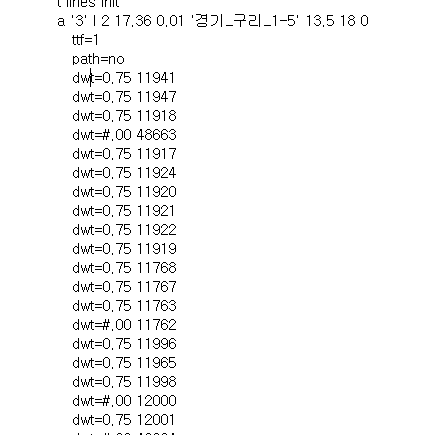

In [61]:
pd.DataFrame(final).to_csv('/content/drive/MyDrive/철도/2030.txt', index=None, header=False)